<a href="https://colab.research.google.com/github/Dubeyanshu/EDA-Submission-/blob/main/EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - AirBnab Bookings Analysis

**Project type** - EDA                                    
**Contribution** - Individual                            
**Team Member** - Ayush Dubey 





# **Project Summary** -

What is Airbnb?                                           
Airbnb is an Amrican Company that operates an online marketplace for lodging,primarily homestayes for vacation rentals and tourism activities.Based in San Francisco,California,the platform is accessible via website and mobile app.                                               

Since 2008 ,guests and hosts have used Airnab to expand on travelling possibilities and present a more unique,personalized way of experiencing the world .Today Airnab
became one of a kind service that is used and recognized
by the whole world.Data analysis on millions of listing provided through Airnab is a crucial factor for the company.These million of listings generate a lot of data -
 data that can be analysed and used for security ,business
 decisions ,understanding of customers and providers(hosts) behavior and performance on the platform ,guiding 
 marketing initiatives,implementations of innovative additional services and much more.

This dataset around 49000 observations in it with 16 columns and it is mix between categorical and numeric values.


 

# **Github Link**-

# **Problem Statement**-






Explore and analyze the data to discover key understanding (not limited to these) such as:

**.** What can be learn about different hosts and areas?      
. What can be learn from predictions?(ex:locations,prices,reviews,etc)                                              
. Which hosts are the busiest and why?                    
. Is there any noticeable difference of traffic among different areas and what could be the reason for it?





# **Let's Begin !**

# **1.Know Your Data**

### **Import Libraries**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset Loading**

In [ ]:
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

### **Dataset First View**



In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Dataset Rows & Columns Count**

In [ ]:
df.shape

(48895, 16)

### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **Null Values**

In [ ]:
Null_Values = df.isnull().sum()
Null_Values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Text(0, 0.5, 'Count Of Null Values')

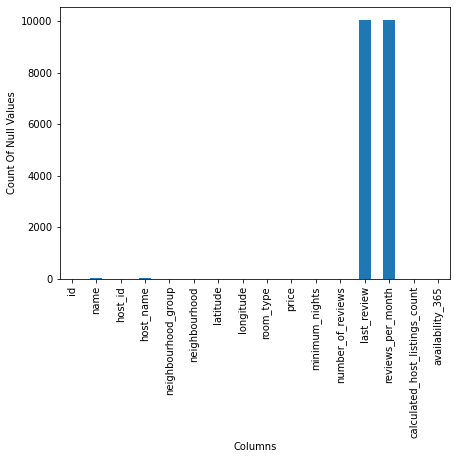

In [ ]:
Null_Values.plot.bar(figsize = (7,5))
plt.xlabel('Columns')
plt.ylabel('Count Of Null Values')


### **Duplicate Values**

In [ ]:
df.duplicated().value_counts()

False    48895
dtype: int64

# **2. Understanding Your Variables**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Check Unique Values For each Variable.

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# **Data Wrangling**

In [ ]:
# Put 0 value in place of Null value
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna(0,inplace=True)

In [ ]:
# Drop unnecessary columns 
df.drop(['name','host_name'],axis=1,inplace=True)

In [ ]:
# Exclude Property with listed price of 0
df = df.loc[df['price'] > 0]

# **4. Data Vizulization, Storytelling & Experimenting with Charts : Understand the relationships between variables.**

### Chart-1

Text(0.5, 1.0, 'Property per room type')

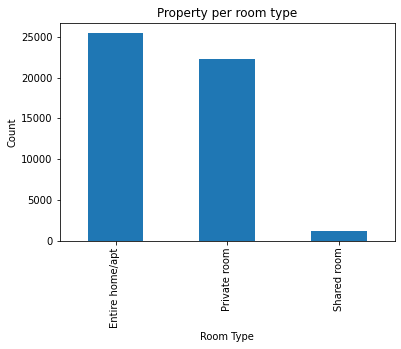

In [ ]:
N = df['room_type'].value_counts()
N.plot.bar(figsize = (6,4))
plt.ioff()
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property per room type')



. This specific Chart pick for Counting property of room type

. The Insight from this chart is Desending order of room type is Entireroom/apt > private room > Shared room

### Chart-2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


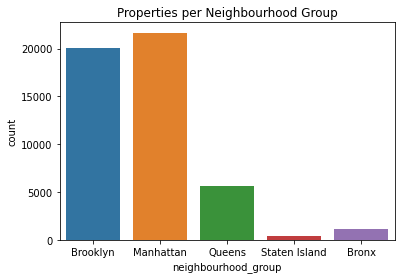

In [ ]:
sns.countplot(df['neighbourhood_group'])
plt.title('Properties per Neighbourhood Group')
plt.ioff()
plt.show()

**.** This Specific chart is pick for counting properties of neighbourhood_group

. The insights from this chart is : 1.Descending order of  properties of neighbourhood group is         Manhattan> Brooklyn > Queens > Bronx > State Island

. From this insight we can create more opportunity for different neighbourhood group

### Chart-3

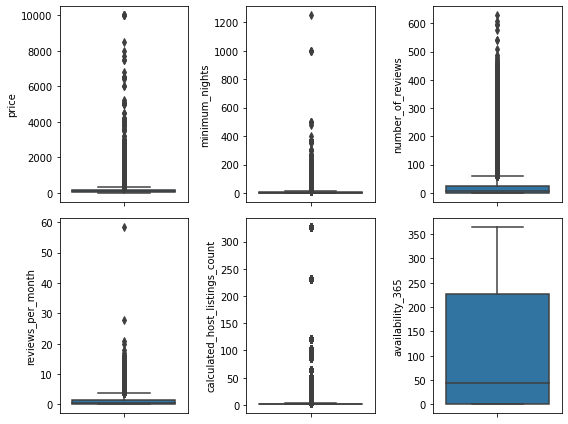

In [ ]:
from pylab import *
f,ax = plt.subplots(figsize = (8,6))

subplot(2,3,1)
sns.boxplot(y=df['price'])

subplot(2,3,2)
sns.boxplot(y=df['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y=df['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y=df['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y=df['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y=df['availability_365'])

plt.tight_layout() # To avoid overlap of graph
plt.draw()

. This Specific chart is useful for detecting outliers


. The insight from this chart is we get the outliers like (for price 10000) which we can remove to make our data more useful

### Chart-4

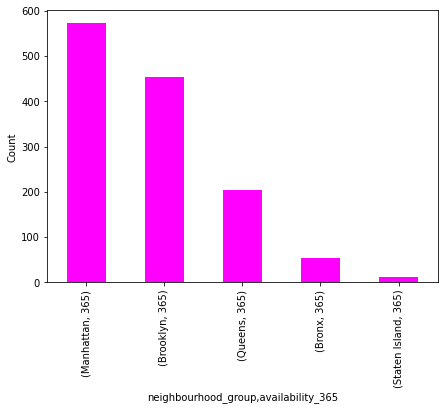

In [ ]:
x = df[df['availability_365'] == 365]
y = x.loc[:,['neighbourhood_group','availability_365']]
z = y.value_counts()
z.plot.bar(figsize = (7,5),color='magenta')
plt.ylabel('Count')
plt.show()

. This Specific chart is pick to count 365 days  availability of different neighbourhood group 

. The insight from this chart is that the descending order of 365 days availability of neighbourhood group is Manhattan > Brooklyn > Queens > Bronx > Staten Island

### Chart-5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


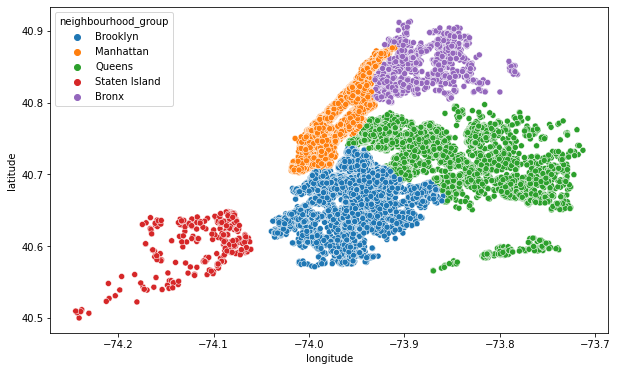

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff
plt.show()


. This Specific Chart is pick to understand the location of different neighbourhood group with the help of longitude and latitude

### Chart-6

<function matplotlib.pyplot.ioff()>

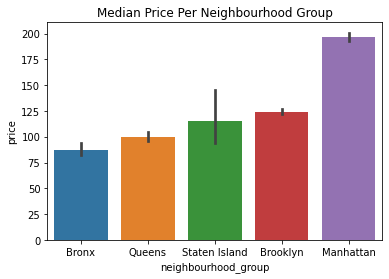

In [ ]:
Result = df.groupby(['neighbourhood_group'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group',y='price',data=df,order=Result['neighbourhood_group'])
plt.title('Median Price Per Neighbourhood Group')
plt.ioff

.This Specific Chart is pick to understand the Median price of each neighbourhood group

The insight from this chart is that descending order of median price for each neighbourhood group is Manhattan > Brooklyn > Staten Island > Queens > Bronx 

### Chart-7

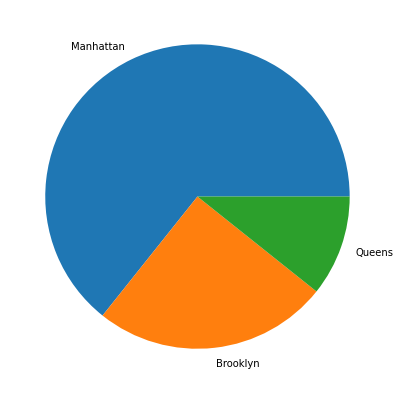

In [ ]:
X = df[(df['minimum_nights'] > 50) & (df['price'] > 400)]
Y = X.loc[:,['neighbourhood_group']]
Z = Y.value_counts()
L = ['Manhattan','Brooklyn','Queens']
plt.figure(figsize = (9,7))
plt.pie(Z,labels=L)
plt.show()



This Specific Chart is pick to understand count of neighbourhood group which has minimum nights is greater than 50 and price is greater than 400

The insight from this chart is that we got following order Manhattan > Brooklyn > Queens

### Chart-8

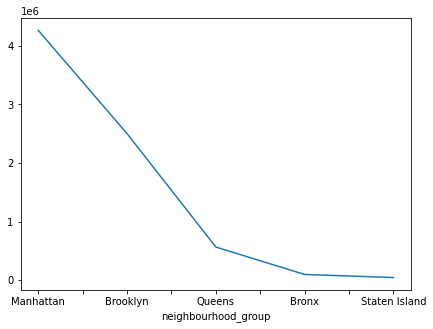

In [ ]:
Result = df.groupby(['neighbourhood_group'])['price'].sum().sort_values(ascending=False)
Result.plot.line(figsize = (7,5))
plt.ioff()

. This Specific Chart is pick to understand most revenue generated neighbourhood group 

. The insight from this chart is that the descending order of most revenue generated neighbourhood group is Manhattan > Brooklyn > Queens > Bronx > Staten Island

### Chart-9

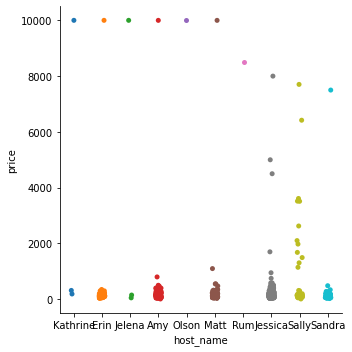

In [ ]:
Result = df.groupby(['host_name'])['price'].max().reset_index().sort_values('price',ascending=False)
Result_1 = Result.head(10)
sns.catplot(x='host_name',y='price',data=df,order=Result_1['host_name'])
plt.tight_layout()



. This Specific Chart is pick to Understand the top 10 host name who has highest price.

### Chart-10

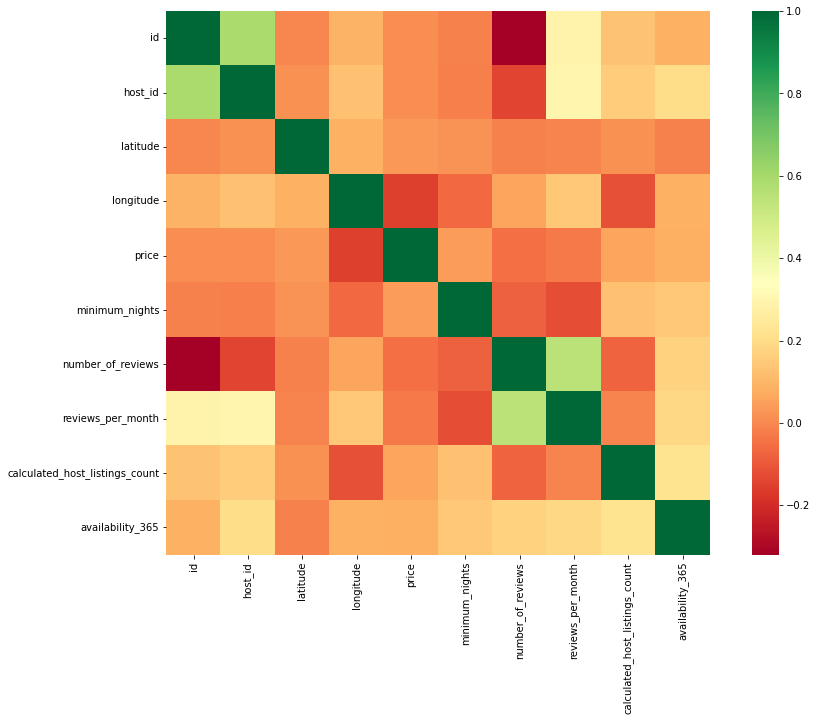

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')
plt.ioff()

. This Specific Chart is Pick to understand the correlation between different Variables

# **Solution to business Objective**

To Achieve the business Objective we can do following things , we can increase 365 availability to give more option to customers  and we can also work reviews so that we can improve our efficiency.